In [1]:
import numpy as np
import torch
import open_clip
import csv
from tqdm import tqdm
import pandas
import matplotlib.pyplot as plt

/home/martin/Documents/MScProject/project_local/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
testsets = {
    "Progan" : ["progan_lsun"],
    "Biggan" : ["biggan_256","biggan_512"],
    "Gaugan" : ["gaugan"],
    "Stargan" : ["stargan"],
    "EG3D" : ["eg3d"],
    "Stylegan 2": ["stylegan2_afhqv2_512x512",
                   "stylegan2_ffhq_256x256",
                   "stylegan2_ffhq_1024x1024",
                   "stylegan2_lsundog_256x256",
                   "whichfaceisreal"],
    "Stylegan 3" : ["stylegan3_r_afhqv2_512x512",
                    "stylegan3_r_ffhqu_256x256",
                    "stylegan3_r_ffhqu_1024x1024",
                    "stylegan3_t_afhqv2_512x512",
                    "stylegan3_t_ffhqu_256x256",
                    "stylegan3_t_ffhqu_1024x1024"],
    "Taming Trans." : ["taming-transformers_class2image_ImageNet",
                             "taming-transformers_noise2image_FFHQ",
                             "taming-transformers_segm2image_valid"],
    "Dall-E Mini" : ["dalle-mini_valid"],
    "Dall-E 2" : ["dalle_2"],
    "Glide" : ["glide_text2img_valid"],
    "Guided Dif." : ["guided-diffusion_class2image_ImageNet",  
                "guided-diffusion_noise2image_LSUNbedrooms",
                "guided-diffusion_noise2image_LSUNcats",
                "guided-diffusion_noise2image_LSUNhorses"],
    "Latent Dif." : ["latent-diffusion_class2image_ImageNet",
                          "latent-diffusion_noise2image_FFHQ",
                          "latent-diffusion_noise2image_LSUNbedrooms",
                          "latent-diffusion_noise2image_LSUNchurches",
                          "latent-diffusion_text2img_valid"],
    "Stable Diff." : ["stable_diffusion_256"],
    "Stable Diff. v2" : ["stable_diffusion_512_50steps",
                             "stable_diffusion_512_100steps",
                             "stable_diffusion_512_200steps"],
    "DeepFakes" : ["deepfake"],
    "Pristine" : ["real_coco_valid", 
                  "real_imagenet_val", 
                  "real_ucid",
                  "ffhq",
                  "celebA",
                  ],
}

In [2]:
grag_accuracies = pandas.read_csv("data/grag_accuracies.csv", header=0, index_col=0)
models = ["Grag2021 ProGAN", "Grag2021 Latent Diff."]
colors = {
    "Grag2021 ProGAN" : 'blue',
    "Grag2021 Latent Diff." : 'orange',
}

In [5]:
allsubmodels = []
for key in testsets:
    allsubmodels = allsubmodels + testsets[key]
tab_metrics = pandas.DataFrame(index=list(allsubmodels), columns = models)

for key in allsubmodels:
    tab_metrics.loc[key, "Grag2021 ProGAN"] = grag_accuracies.loc[key, "Grag2021_progan"]
    tab_metrics.loc[key, "Grag2021 Latent Diff."] = grag_accuracies.loc[key, "Grag2021_latent"]

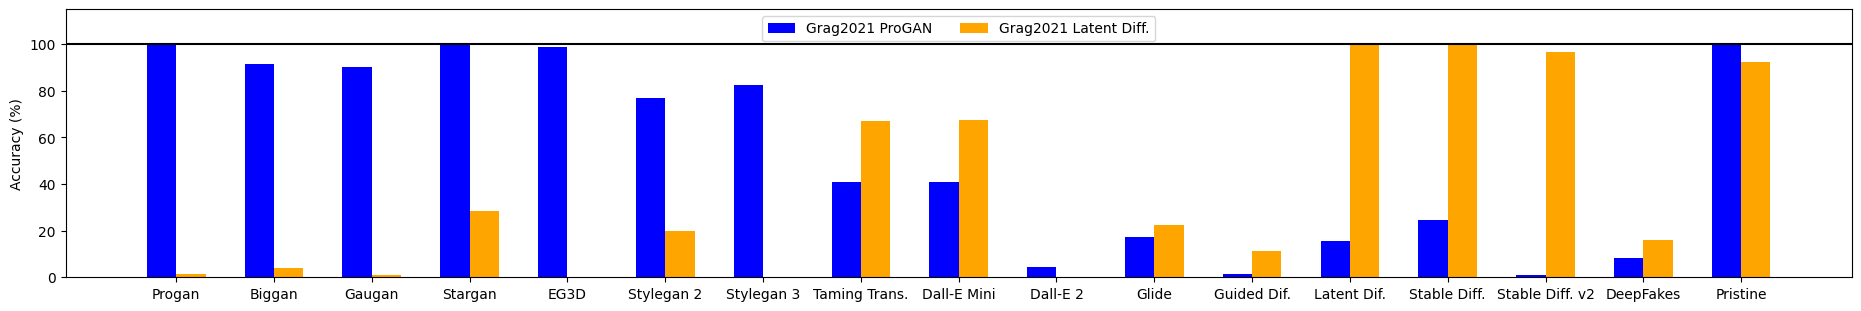

In [6]:
plot_sets = list(testsets.keys())
plot_models = models

x = np.arange(len(plot_sets))
width = 0.30
multiplier = 0.5
fig, ax = plt.subplots(layout='constrained')
fig.set_size_inches(18.5, 3.0)

for model in plot_models:
    measurement = []
    for set in plot_sets:
        subsets = testsets[set]
        m = np.mean([tab_metrics.loc[subset, model] for subset in subsets])
        measurement.append(m)
    measurement = tuple([m * 100 for m in measurement])
    offset = width * multiplier
    rects = ax.bar(x+offset, measurement, width, label=model, color=colors[model])
    multiplier += 1

ax.set_ylabel("Accuracy (%)")
ax.set_xticks(x+width, plot_sets)
ax.legend(loc='upper center', ncols=2)
ax.set_ylim(0,115)
ax.axhline(y = 100, color = 'black', linestyle = '-')

plt.show()
    

Grag2021 ProGAN : GAN(95.5696034581881) VQGAN(70.34995747873937 DM(58.9729783120727) MEAN(74.66631486463946)
Grag2021 Latent Diff. : GAN(50.21630886872008) VQGAN(79.98481073870269 DM(75.35173782203603) MEAN(63.03300062898041)


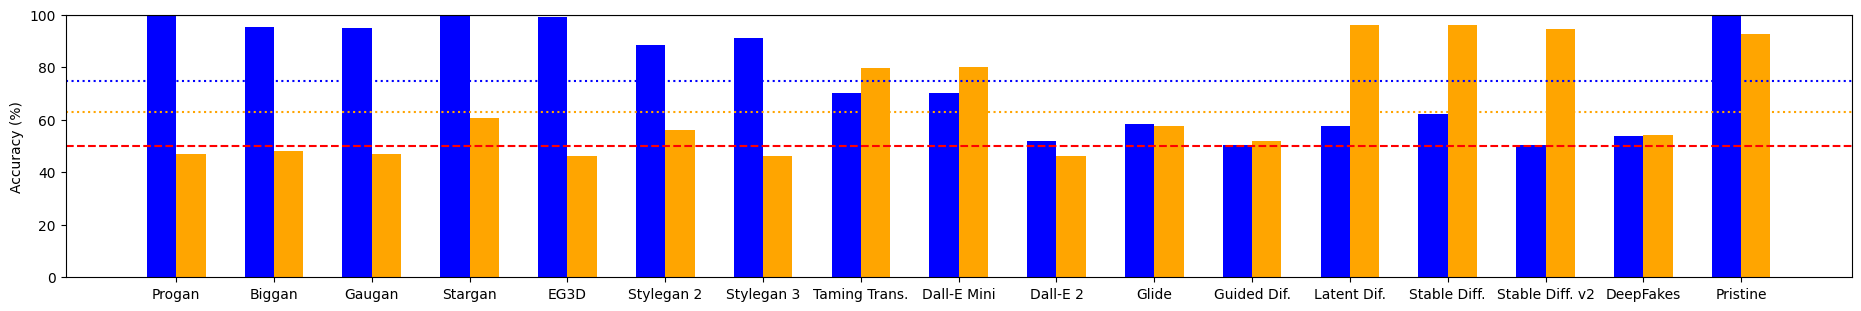

In [7]:
plot_sets = list(testsets.keys())
plot_models = models

x = np.arange(len(plot_sets))
width = 0.30
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained')
fig.set_size_inches(18.5, 3.0)

for model in plot_models:
    measurement = []
    for set in plot_sets:
        subsets = testsets[set]
        m = np.mean([tab_metrics.loc[subset, model] for subset in subsets])
        measurement.append(m)
    pristine_mean = np.mean([tab_metrics.loc[subset, model] for subset in testsets["Pristine"]])
    measurement = [(m+pristine_mean)/ 2 * 100 for m in measurement]
    GAN_accuracy = np.mean(measurement[0:7])
    VQGAN_accuracy = np.mean(measurement[7:9])
    DM_accuracy = np.mean(measurement[7:-2])
    mean_accuracy = np.mean(measurement[:-1])
    print(f"{model} : GAN({GAN_accuracy}) VQGAN({VQGAN_accuracy} DM({DM_accuracy}) MEAN({mean_accuracy})")
    measurement = tuple(measurement)
    offset = width * multiplier
    rects = ax.bar(x+offset, measurement, width, label=model, color = colors[model])
    ax.axhline(y = mean_accuracy, linestyle= ":", color=colors[model])
    multiplier += 1

ax.set_ylabel("Accuracy (%)")
ax.set_xticks(x+width, plot_sets)
ax.set_ylim(0,100)
ax.axhline(y = 50, color = 'r', linestyle = '--')
ax.axhline(y = 100, color = 'black', linestyle = '-')

plt.show()
    